In [1]:
import numpy as np
import pandas as pd

C:\Users\shubh\AppData\Local\Temp\ipykernel_6584\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_confirmed_cases = pd.read_csv("time_series_covid19_confirmed_US.csv")

df_deaths = pd.read_csv("time_series_covid19_deaths_US.csv")

df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

In [3]:
print(df_confirmed_cases.head())

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   1975

In [4]:
print(df_deaths.head())

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...     230     232     232     232     232     232   
1  30.727750 -87.722071  ...     724     726     726     726     726     726   
2  31.868263 -85.387129  ...     103     103     103     103     103     103   
3  32.996421 -87.125115  ...     109     109     109     109     109     109   
4  33.982109 -86.567906  ...     261     261     261     261     261     261   

   3/6/23  3/7/23  3/8/23  3/9/23  
0     23

In [5]:
print(df_vaccinations.head())

         date location  total_vaccinations  total_distributed  \
0  2021-01-12  Alabama             78134.0           377025.0   
1  2021-01-13  Alabama             84040.0           378975.0   
2  2021-01-14  Alabama             92300.0           435350.0   
3  2021-01-15  Alabama            100567.0           444650.0   
4  2021-01-16  Alabama                 NaN                NaN   

   people_vaccinated  people_fully_vaccinated_per_hundred  \
0            70861.0                                 0.15   
1            74792.0                                 0.19   
2            80480.0                                  NaN   
3            86956.0                                 0.28   
4                NaN                                  NaN   

   total_vaccinations_per_hundred  people_fully_vaccinated  \
0                            1.59                   7270.0   
1                            1.71                   9245.0   
2                            1.88                      N

In [6]:
# Calculate total cases and deaths for each province
total_cases_by_province = df_confirmed_cases.groupby('Province_State').sum().iloc[:, 11:].sum(axis=1)
total_deaths_by_province = df_deaths.groupby('Province_State').sum().iloc[:, 11:].sum(axis=1)

# Create a DataFrame to store the results
df_total_cases_deaths_by_province = pd.DataFrame({'Total_Cases': total_cases_by_province, 'Total_Deaths': total_deaths_by_province})

# Reset index to make 'Province_State' a column
df_total_cases_deaths_by_province.reset_index(inplace=True)

# Display the resulting DataFrame
print(df_total_cases_deaths_by_province)


              Province_State  Total_Cases  Total_Deaths
0                    Alabama    872756073      13398261
1                     Alaska    153011898        751555
2             American Samoa      2608837         10804
3                    Arizona   1330372436      20789702
4                   Arkansas    549955573       7721989
5                 California   6166190335      65490302
6                   Colorado    922394521       8942186
7                Connecticut    507631287       8911110
8                   Delaware    171886464       2089142
9           Diamond Princess        53306             0
10      District of Columbia     90279276       1140001
11                   Florida   3978357707      51475342
12                   Georgia   1698658727      26228841
13            Grand Princess       111231          3209
14                      Guam     27172745        232819
15                    Hawaii    153864444        922359
16                     Idaho    292218765       

In [13]:
# import ipywidgets as widgets
# from IPython.display import display

# # Function to calculate total cases within the specified latitude and longitude range
# def calculate_total_cases_within_range(min_lat, max_lat, min_long, max_long):
#     # Filter DataFrame based on latitude and longitude range
#     filtered_df = df_confirmed_cases[(df_confirmed_cases['Lat'] >= min_lat) & (df_confirmed_cases['Lat'] <= max_lat) & 
#                                      (df_confirmed_cases['Long_'] >= min_long) & (df_confirmed_cases['Long_'] <= max_long)]
    
#     # Calculate total cases for each province within the filtered range
#     total_cases_by_province = filtered_df.groupby('Province_State').sum().iloc[:, 11:].sum(axis=1)
    
#     # Create a DataFrame to store the results
#     df_total_cases_within_range = pd.DataFrame({'Province_State': total_cases_by_province.index, 'Total_Cases': total_cases_by_province})
    
#     # Reset index to make 'Province_State' a column
#     df_total_cases_within_range.reset_index(drop=True, inplace=True)
    
#     # Display the resulting DataFrame
#     display(df_total_cases_within_range)

# # Define sliders for latitude and longitude range
# min_lat_slider = widgets.FloatSlider(value=-90.0, min=-90.0, max=90.0, step=0.1, description='Min Latitude:')
# max_lat_slider = widgets.FloatSlider(value=90.0, min=-90.0, max=90.0, step=0.1, description='Max Latitude:')
# min_long_slider = widgets.FloatSlider(value=-180.0, min=-180.0, max=180.0, step=0.1, description='Min Longitude:')
# max_long_slider = widgets.FloatSlider(value=180.0, min=-180.0, max=180.0, step=0.1, description='Max Longitude:')

# # Create a button to trigger the calculation
# calculate_button = widgets.Button(description='Calculate Total Cases')

# # Define function to handle button click event
# def on_button_click(b):
#     calculate_total_cases_within_range(min_lat_slider.value, max_lat_slider.value, min_long_slider.value, max_long_slider.value)

# # Attach button click event handler
# calculate_button.on_click(on_button_click)

# # Display the sliders and button
# display(min_lat_slider, max_lat_slider, min_long_slider, max_long_slider, calculate_button)


In [12]:
import ipywidgets as widgets
from IPython.display import display

# Get minimum and maximum latitude and longitude values from the dataset
min_lat_value = df_confirmed_cases['Lat'].min()
max_lat_value = df_confirmed_cases['Lat'].max()
min_long_value = df_confirmed_cases['Long_'].min()
max_long_value = df_confirmed_cases['Long_'].max()

# Function to calculate total cases within the specified latitude and longitude range
def calculate_total_cases_within_range(min_lat, max_lat, min_long, max_long):
    # Filter DataFrame based on latitude and longitude range
    filtered_df = df_confirmed_cases[(df_confirmed_cases['Lat'] >= min_lat) & (df_confirmed_cases['Lat'] <= max_lat) & 
                                     (df_confirmed_cases['Long_'] >= min_long) & (df_confirmed_cases['Long_'] <= max_long)]
    
    # Calculate total cases for each province within the filtered range
    total_cases_by_province = filtered_df.groupby('Province_State').sum().iloc[:, 11:].sum(axis=1)
    
    # Create a DataFrame to store the results
    df_total_cases_within_range = pd.DataFrame({'Province_State': total_cases_by_province.index, 'Total_Cases': total_cases_by_province})
    
    # Reset index to make 'Province_State' a column
    df_total_cases_within_range.reset_index(drop=True, inplace=True)
    
    # Display the resulting DataFrame
    display(df_total_cases_within_range)

# Define sliders for latitude and longitude range
min_lat_slider = widgets.FloatSlider(value=min_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Min Latitude:')
max_lat_slider = widgets.FloatSlider(value=max_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Max Latitude:')
min_long_slider = widgets.FloatSlider(value=min_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Min Longitude:')
max_long_slider = widgets.FloatSlider(value=max_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Max Longitude:')

# Create a button to trigger the calculation
calculate_button = widgets.Button(description='Calculate Total Cases')

# Define function to handle button click event
def on_button_click(b):
    calculate_total_cases_within_range(min_lat_slider.value, max_lat_slider.value, min_long_slider.value, max_long_slider.value)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display the sliders and button
display(min_lat_slider, max_lat_slider, min_long_slider, max_long_slider, calculate_button)



FloatSlider(value=-14.271, description='Min Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=69.31479216, description='Max Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=-174.1596, description='Min Longitude:', max=145.6739, min=-174.1596)

FloatSlider(value=145.6739, description='Max Longitude:', max=145.6739, min=-174.1596)

Button(description='Calculate Total Cases', style=ButtonStyle())

,Province_State,Total_Cases
0,Alabama,872756073
1,Alaska,505868
2,Arizona,1330372436
3,Arkansas,549955573
4,California,6166190335
5,Colorado,922394521
6,Connecticut,507631287
7,Delaware,171886464
8,Diamond Princess,53306
9,District of Columbia,90279276


In [17]:
# Heatmap for total cases

import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from IPython.display import display

# Get minimum and maximum latitude and longitude values from the dataset
min_lat_value = df_confirmed_cases['Lat'].min()
max_lat_value = df_confirmed_cases['Lat'].max()
min_long_value = df_confirmed_cases['Long_'].min()
max_long_value = df_confirmed_cases['Long_'].max()

# Function to calculate total cases within the specified latitude and longitude range
def calculate_total_cases_within_range(min_lat, max_lat, min_long, max_long):
    # Filter DataFrame based on latitude and longitude range
    filtered_df = df_confirmed_cases[(df_confirmed_cases['Lat'] >= min_lat) & (df_confirmed_cases['Lat'] <= max_lat) & 
                                     (df_confirmed_cases['Long_'] >= min_long) & (df_confirmed_cases['Long_'] <= max_long)]
    
    # Drop rows with NaN values in latitude and longitude columns
    filtered_df = filtered_df.dropna(subset=['Lat', 'Long_'])
    
    # Check if there are any rows left after dropping NaN values
    if filtered_df.empty:
        print("No data available for the selected range.")
        return
    
    # Create a heatmap
    heatmap_data = filtered_df[['Lat', 'Long_']]
    m = folium.Map(location=[min_lat, min_long], zoom_start=5)
    HeatMap(data=heatmap_data, radius=10).add_to(m)
    
    # Display the map
    display(m)

# Define sliders for latitude and longitude range
min_lat_slider = widgets.FloatSlider(value=min_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Min Latitude:')
max_lat_slider = widgets.FloatSlider(value=max_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Max Latitude:')
min_long_slider = widgets.FloatSlider(value=min_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Min Longitude:')
max_long_slider = widgets.FloatSlider(value=max_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Max Longitude:')

# Create a button to trigger the calculation
calculate_button = widgets.Button(description='Generate Heatmap')

# Define function to handle button click event
def on_button_click(b):
    calculate_total_cases_within_range(min_lat_slider.value, max_lat_slider.value, min_long_slider.value, max_long_slider.value)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display the sliders and button
display(min_lat_slider, max_lat_slider, min_long_slider, max_long_slider, calculate_button)


FloatSlider(value=-14.271, description='Min Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=69.31479216, description='Max Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=-174.1596, description='Min Longitude:', max=145.6739, min=-174.1596)

FloatSlider(value=145.6739, description='Max Longitude:', max=145.6739, min=-174.1596)

Button(description='Generate Heatmap', style=ButtonStyle())

In [20]:
## HeatMap for deaths

import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from IPython.display import display

# Get minimum and maximum latitude and longitude values from the dataset
min_lat_value = df_deaths['Lat'].min()
max_lat_value = df_deaths['Lat'].max()
min_long_value = df_deaths['Long_'].min()
max_long_value = df_deaths['Long_'].max()

# Function to calculate total deaths within the specified latitude and longitude range
def calculate_total_deaths_within_range(min_lat, max_lat, min_long, max_long):
    # Filter DataFrame based on latitude and longitude range
    filtered_df = df_deaths[(df_deaths['Lat'] >= min_lat) & (df_deaths['Lat'] <= max_lat) & 
                            (df_deaths['Long_'] >= min_long) & (df_deaths['Long_'] <= max_long)]
    
    # Drop rows with NaN values in latitude and longitude columns
    filtered_df = filtered_df.dropna(subset=['Lat', 'Long_'])
    
    # Check if there are any rows left after dropping NaN values
    if filtered_df.empty:
        print("No data available for the selected range.")
        return
    
    # Create a heatmap
    heatmap_data = filtered_df[['Lat', 'Long_']]
    m = folium.Map(location=[min_lat, min_long], zoom_start=5)
    HeatMap(data=heatmap_data, radius=10).add_to(m)
    
    # Display the map
    display(m)

# Define sliders for latitude and longitude range
min_lat_slider = widgets.FloatSlider(value=min_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Min Latitude:')
max_lat_slider = widgets.FloatSlider(value=max_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Max Latitude:')
min_long_slider = widgets.FloatSlider(value=min_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Min Longitude:')
max_long_slider = widgets.FloatSlider(value=max_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Max Longitude:')

# Create a button to trigger the calculation
calculate_button = widgets.Button(description='Generate Death Heatmap')

# Define function to handle button click event
def on_button_click(b):
    calculate_total_deaths_within_range(min_lat_slider.value, max_lat_slider.value, min_long_slider.value, max_long_slider.value)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display the sliders and button
display(min_lat_slider, max_lat_slider, min_long_slider, max_long_slider, calculate_button)


FloatSlider(value=-14.271, description='Min Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=69.31479216, description='Max Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=-174.1596, description='Min Longitude:', max=145.6739, min=-174.1596)

FloatSlider(value=145.6739, description='Max Longitude:', max=145.6739, min=-174.1596)

Button(description='Generate Death Heatmap', style=ButtonStyle())

In [21]:
#### Visualization 2

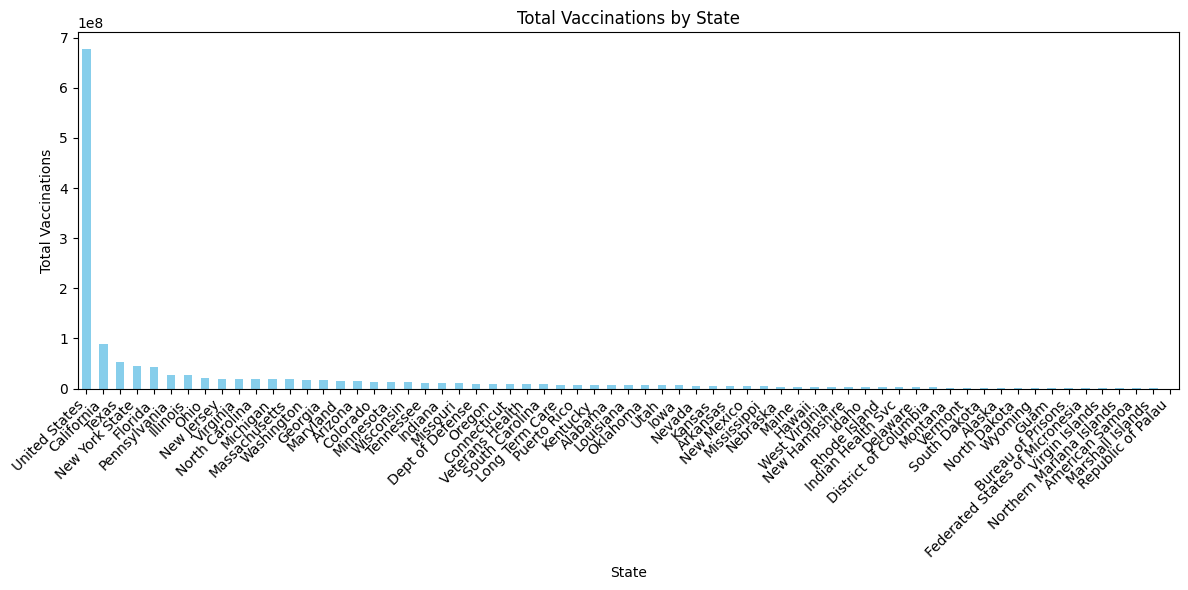

In [24]:
import matplotlib.pyplot as plt

# Aggregate total vaccinations by state
vaccinations_by_state = df_vaccinations.groupby('location')['total_vaccinations'].max().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
vaccinations_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Vaccinations by State')
plt.xlabel('State')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
## here refer to the HTML file which is created

##TRY IF YOU CAN DISPLAY IT IN THE IBYNB FILE AS WELL

import plotly.express as px
import plotly.io as pio

# Aggregate total vaccinations by state
vaccinations_by_state = df_vaccinations.groupby('location')['total_vaccinations'].max().sort_values(ascending=False).reset_index()

# Plotting the bar plot
fig = px.bar(vaccinations_by_state, x='location', y='total_vaccinations', color='total_vaccinations', 
             labels={'location': 'State', 'total_vaccinations': 'Total Vaccinations'}, 
             title='Total Vaccinations by State')
fig.update_layout(xaxis_tickangle=-45)

# Save the figure to an HTML file
pio.write_html(fig, 'total_vaccinations_bar_plot.html')




ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [3]:
import pandas as pd
import folium

# Load the vaccination dataset
df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

# Select relevant columns (state, latitude, longitude, total_vaccinations)
df_vaccinations = df_vaccinations[['location', 'total_vaccinations', 'Lat', 'Long_']]

# Drop rows with missing latitude or longitude values
df_vaccinations = df_vaccinations.dropna(subset=['Lat', 'Long_'])

# Create a Folium map centered on the United States
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each state with the size of the marker based on total vaccinations
for index, row in df_vaccinations.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long_']],
        radius=row['total_vaccinations'] / 100000,  # Adjust the divisor for appropriate marker size
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"{row['location']}: {row['total_vaccinations']} vaccinations"
    ).add_to(us_map)

# Display the map
us_map.save('vaccination_map.html')


KeyError: "['Lat', 'Long_'] not in index"

<Figure size 1000x600 with 0 Axes>

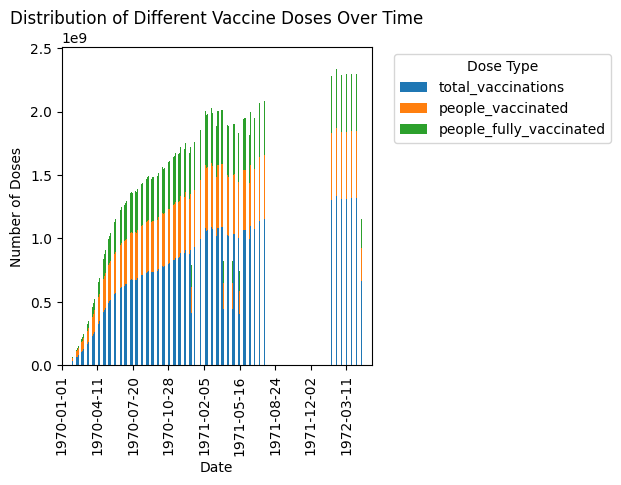

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Load the vaccination dataset
df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

# Select relevant columns (date, total_vaccinations, people_vaccinated, people_fully_vaccinated)
df_vaccinations = df_vaccinations[['date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]

# Convert date column to datetime format
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])

# Group by date and sum the doses for each type
df_grouped = df_vaccinations.groupby('date').sum()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', stacked=True)

# Set x-axis tick frequency
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of ticks as needed

plt.title('Distribution of Different Vaccine Doses Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Doses')
plt.legend(title='Dose Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed

# Load the vaccination dataset
df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

# Function to plot total vaccinations based on selected date range and location
def plot_vaccinations(start_date, end_date, location):
    # Filter the dataset based on selected date range and location
    df_filtered = df_vaccinations[(df_vaccinations['date'] >= start_date) & 
                                  (df_vaccinations['date'] <= end_date) &
                                  (df_vaccinations['location'] == location)]
    
    # Plot total vaccinations
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered['total_vaccinations'], marker='o', linestyle='-')
    plt.title(f'Total Vaccinations in {location} ({start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Total Vaccinations')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define date range widget
start_date_widget = widgets.DatePicker(description='Start Date:', value=df_vaccinations['date'].min())
end_date_widget = widgets.DatePicker(description='End Date:', value=df_vaccinations['date'].max())

# Define location selection widget
location_widget = widgets.Dropdown(description='Location:', options=df_vaccinations['location'].unique())

# Interactively update the plot based on selected date range and location
interact(plot_vaccinations, start_date=start_date_widget, end_date=end_date_widget, location=location_widget)


AttributeError: 'str' object has no attribute 'year'